Import dataset: [credit card](https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv)

In [ ]:
# Set up Kaggle

import json
token = {"username":"ngungu46","key":"bdc647a0e1beed7a20e36fd4df045d7a"}

!mkdir -p '/root/.kaggle/'

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(token, file)

!chmod 600 $'/root/.kaggle/kaggle.json'

In [ ]:
# Download Credit Card Fraud Detection

!mkdir -p /content/dataset
%cd /content/dataset/
!kaggle datasets download -d mlg-ulb/creditcardfraud

/content/dataset
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Unzip

!unzip -q creditcardfraud.zip

replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
!ls

catboost_info  creditcard.csv  creditcardfraud.zip


Import packages

In [ ]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns

Check data

In [ ]:
#Check imported data

df = pd.read_csv('creditcard.csv')

print(df.shape)

print("First 10 lines: ")
print(df.head(10))

print("Describe: ")
print(df.describe())

print("Information: ")
print(df.info())

(284807, 31)
First 10 lines: 
   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0
5   2.0 -0.425966  0.960523  1.141109  ...  0.253844  0.081080    3.67      0
6   4.0  1.229658  0.141004  0.045371  ...  0.034507  0.005168    4.99      0
7   7.0 -0.644269  1.417964  1.074380  ... -1.206921 -1.085339   40.80      0
8   7.0 -0.894286  0.286157 -0.113192  ...  0.011747  0.142404   93.20      0
9   9.0 -0.338262  1.119593  1.044367  ...  0.246219  0.083076    3.68      0

[10 rows x 31 columns]
Describe: 
                Time            V1  ...         Amount          Class
count  

Class


Text(0, 0.5, '')

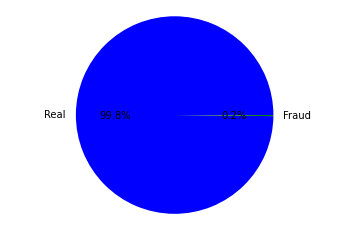

In [ ]:
print("Class")
fig, ax = plt.subplots(1,1)
ax.pie(df.Class.value_counts(), autopct='%1.1f%%',labels=['Real','Fraud'], colors=['b','g'])
plt.axis('equal')
plt.ylabel('')

Data Processing before treating imbalancy



In [ ]:
X = df.drop('Class', axis = 1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

gnb = GaussianNB()
gnb.fit(X_train, y_train)
test_predict = gnb.predict(X_test)
print(confusion_matrix(y_test, test_predict))
print(classification_report(y_test, test_predict))
print(accuracy_score(y_test, test_predict))

[[56478   375]
 [   30    79]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56853
           1       0.17      0.72      0.28       109

    accuracy                           0.99     56962
   macro avg       0.59      0.86      0.64     56962
weighted avg       1.00      0.99      1.00     56962

0.9928899968399986


Precision score of 1 is low due to imbalanced data between 1 and 0. 

Processing Imbalanced Data with SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


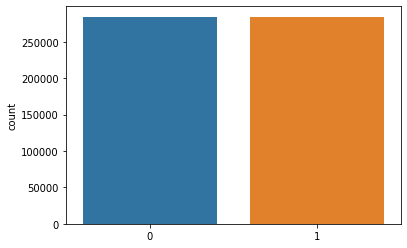

In [ ]:
X = df.drop('Class', axis = 1)
y = df['Class']
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
sns.countplot(y)

In [ ]:
# create new balanced data frame

X = pd.DataFrame(X)
y = pd.DataFrame(y)
df1 = pd.concat([X,y], axis = 1)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,0
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,75769.125144,-1.756669,1.072407,-1.716714,0.529116,-0.584399,0.283902,-2.068326,-1.456660,-2.238380,-1.240357,1.120488,-2.113721,-0.286074,-1.831546,0.808505,-0.649936,-1.092447,-1.001482,2.438291,0.651029,-0.596102,0.820033,-0.193992,-1.055388,0.037034,0.094296,-0.090739,0.221103,69.657369,1
568626,157055.862162,-0.065519,2.966387,-3.280189,5.058299,1.518023,-1.166053,-0.000948,0.278350,-3.105715,-1.958180,2.091241,-3.191926,-0.548354,-6.059570,-0.215141,-0.007729,0.517115,1.164554,-0.274329,0.256679,0.246454,0.044954,-0.319497,-0.705422,0.174095,0.430435,0.135508,0.001264,3.480627,1
568627,129693.391703,0.005671,2.401023,-5.467898,3.734186,0.310284,-1.884870,-1.741758,0.607855,-1.520919,-4.040079,3.337554,-4.313216,-1.346538,-7.829729,0.315315,-2.575879,-1.407305,0.309008,1.599793,0.197444,0.298934,-0.113569,0.246248,-0.031411,-0.285298,-0.338476,0.214930,-0.114499,1.652168,1
568628,151964.419461,-5.016982,3.277259,-5.916985,4.772103,-1.054566,-1.822472,-3.497468,-0.157590,-1.797479,-3.782623,4.072809,-7.429657,-0.470340,-10.982398,1.587341,-4.710093,-6.428040,-1.854728,1.699760,-0.435142,1.218098,0.379955,0.024429,0.246895,-0.241672,0.412719,-2.224614,1.122735,0.409461,1


In [ ]:
df1.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
0     0
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
test_predict = gnb.predict(X_test)
print(confusion_matrix(y_test, test_predict))
print(classification_report(y_test, test_predict))
print(accuracy_score(y_test, test_predict))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[56374   407]
 [14804 42141]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     56781
           1       0.99      0.74      0.85     56945

    accuracy                           0.87    113726
   macro avg       0.89      0.87      0.86    113726
weighted avg       0.89      0.87      0.86    113726

0.8662487030230555


The result is now better with higher accuracy for 1, but the accuracy for predicting 0 decreases. 

The below compared this method to the accuracy achieved when we use Logistic regression. 

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
test_predict = log_reg.predict(X_test)
print(confusion_matrix(y_test, test_predict))
print(classification_report(y_test, test_predict))
print(accuracy_score(y_test, test_predict))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[55666  1115]
 [ 2086 54859]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     56781
           1       0.98      0.96      0.97     56945

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726

0.9718534020364736


Precision score improves significantly.